# Assignment 4
## Machine Learning Fashionista
### Import & Format Data
First, I formatted the images using code from the `load_images.py` file given in the Session 7 Pre-Class Work. I also reused some code from my LBA to plot the images and figures throughout the analysis.

In [127]:
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [128]:
# resize and crop images

def resize_images(images):
    '''
    Resizes and crops images using the function given
    in the Session 7 repo from load_images.py.
    '''    

    flattened = []
    # for each image path
    for path in images:
        # open it as a read file in binary mode
        with open(path, 'r+b') as f:
            # open it as an image
            with Image.open(f) as image:
                # resize the image to be more manageable
                cover = resizeimage.resize_cover(image, [64, 64])
                # flatten the matrix to an array and 
                # append it to all flattened images
                flattened.append((np.array(cover).flatten(), 0))


    # Flatten it once more
    flattened = np.asarray(flattened)

    # Declare which are the X and Y inputs
    X = flattened[:,0]
    Y = flattened[:,1]

    # Use np.stack to put the data into the right dimension
    X = np.stack(i for i in X)
    Y = np.stack(i for i in Y)
    
    # return resized images
    return X, Y

In [129]:
# import and resize images

shirts = glob('shirts/*')
jerseys = glob('jerseys/*')

shirts_img = resize_images(shirts)[0]
jerseys_img = resize_images(jerseys)[0]

/Users/sarahpoisner/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/Users/sarahpoisner/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


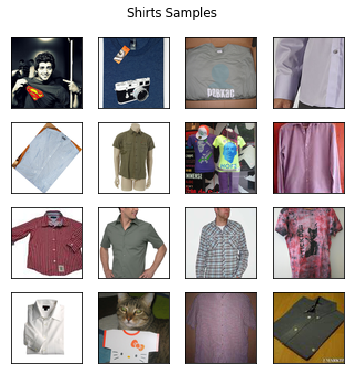

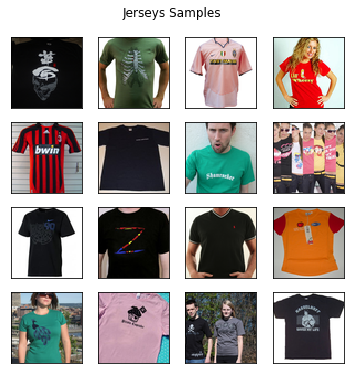

In [130]:
# plot samples of images

def plot_images(images, clothing_type):
    '''
    Reshape and display samples of images from arrays.
    '''
    
    fig = plt.figure(figsize=(6,6)) 

    for i in range(16): 
        ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[]) 
        img = Image.fromarray(images[i].reshape(64,64,3), 'RGB') 
        ax.imshow(img, interpolation='nearest') 

    plt.suptitle(f'{clothing_type} Samples', y=0.95)
    plt.show()

# plot shirts and jerseys images
plot_images(shirts_img, "Shirts")
plot_images(jerseys_img, "Jerseys")

I combined the two datasets into one dataset with a binary variable for shirts (0) and jerseys (1).

In [131]:
# assign binary classifications
shirt = np.zeros((len(shirts_img), 1)) # shirt = 0
jersey = np.ones((len(jerseys_img), 1)) # jersey = 1

# append binary classifications to images
shirt_data = np.append(shirts_img, shirt, axis=1)
jersey_data = np.append(jerseys_img, jersey, axis=1)

# combine shirt and jersey data into one dataset
data = np.concatenate((shirt_data, jersey_data))
print(data.shape)

# create dataframe
df = pd.DataFrame(data)
df = df.rename(columns={df.columns[-1]: 'Type'})
df

(2791, 12289)


,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,Type
0,2.0,3.0,15.0,3.0,4.0,16.0,2.0,4.0,17.0,3.0,...,0.0,0.0,12.0,1.0,1.0,13.0,15.0,18.0,31.0,0.0
1,250.0,250.0,250.0,250.0,250.0,250.0,238.0,238.0,237.0,250.0,...,245.0,245.0,245.0,250.0,250.0,250.0,251.0,251.0,251.0,0.0
2,114.0,75.0,53.0,116.0,74.0,50.0,120.0,78.0,54.0,126.0,...,108.0,73.0,52.0,103.0,68.0,48.0,102.0,66.0,46.0,0.0
3,200.0,199.0,197.0,201.0,200.0,198.0,202.0,201.0,199.0,203.0,...,194.0,190.0,210.0,191.0,185.0,206.0,190.0,186.0,205.0,0.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,52.0,52.0,58.0,56.0,55.0,61.0,51.0,50.0,56.0,1.0
2787,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1.0
2788,125.0,125.0,123.0,124.0,124.0,123.0,124.0,124.0,124.0,122.0,...,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,118.0,1.0
2789,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,1.0


### Logistic Regression Model
I split the dataset into 80% training data and 20% testing data.

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, plot_confusion_matrix, \
accuracy_score, roc_curve, roc_auc_score

In [133]:
### Define Variables ###

# use all but 'Type' as independent variables
X = df.drop(columns='Type')

# use 'Type' as dependent variable
y = df['Type']

# split into train and test data
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state=0)

Next, I built a logistic regression classifier using the original pixel data. I applied Grid-Search Cross-Validation to optimize the logistic regression parameters.

In [58]:
%%time
# create the hyperparameter grid
param_grid = {'C' : [0.1,1,10], 
              'solver' : ['lbfgs', 'sag', 'saga'], 
              'tol' : [0.001, 0.01, 1]}

# create logistic regression classifier
logregs = LogisticRegression()

# define GridSearchCV object
logreg_cv = GridSearchCV(logregs, param_grid, cv=5)

# fit GridSearchCV object to training data
logreg_cv.fit(X_train, y_train)

print('Cross-Validation Complete')

/Users/sarahpoisner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/sarahpoisner/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

Cross-Validation Complete
CPU times: user 23min 17s, sys: 45.9 s, total: 24min 3s
Wall time: 16min 47s


In [135]:
# print best parameters and best score
print(f'Tuned Log-Reg Parameters: {logreg_cv.best_params_}')
print(f'Tuned Log-Reg Accuracy: {logreg_cv.best_score_}')

Tuned Log-Reg Parameters: {'C': 1, 'solver': 'saga', 'tol': 1}
Tuned Log-Reg Accuracy: 0.6066251341780279


In [136]:
# create the classifier
logreg = LogisticRegression(C=1, solver='saga', tol=1)

# fit the classifier to the training data
logreg.fit(X_train,y_train)

# predict the labels of the test set
y_pred = logreg.predict(X_test)

In [137]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# ccompute and print accuracy scores and error rates
score_train = np.round(logreg.score(X_train, y_train),3)
score_test = np.round(logreg.score(X_test, y_test),3)
print(f'Accuracy Score (Train): {score_train}')
print(f'Accuracy Score (Test): {score_test}')
print(f'Error Rate (Train): {1-score_train}')
print(f'Error Rate (Test): {1-score_test}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.96      0.73       307
         1.0       0.81      0.19      0.31       252

    accuracy                           0.62       559
   macro avg       0.70      0.58      0.52       559
weighted avg       0.69      0.62      0.54       559

Accuracy Score (Train): 0.616
Accuracy Score (Test): 0.615
Error Rate (Train): 0.384
Error Rate (Test): 0.385


<Figure size 432x288 with 0 Axes>

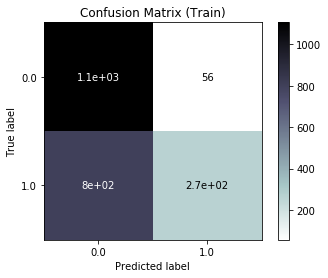

<Figure size 432x288 with 0 Axes>

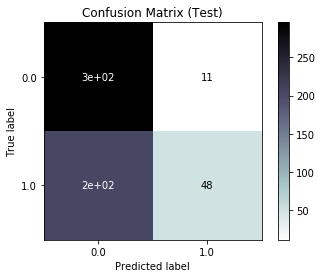

In [138]:
# plot confusion matrices

# train data
plt.figure()
plot_confusion_matrix(logreg, X_train, y_train, cmap=plt.cm.bone_r)
plt.title('Confusion Matrix (Train)')
plt.show()

# test data
plt.figure()
plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.bone_r)
plt.title('Confusion Matrix (Test)')
plt.show()

### Logistic Regression With PCA Model
Next, I built another logistic regression classifier using the original pixel data, now using PCA. First, I determined how many components to use to explain 95% of the variance. As seen in the figure below, that number is around 500, so I used 500 components.

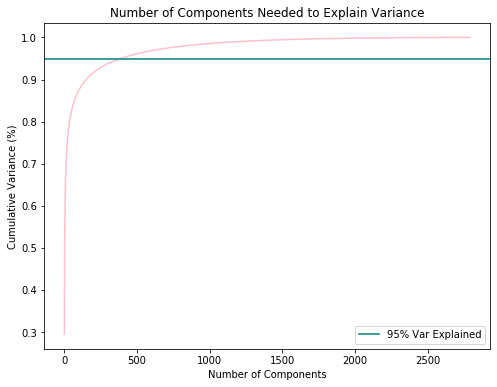

In [139]:
# apply PCA using all components
n_components = len(X)
pca_test = decomposition.PCA(n_components=n_components)

# fit images to PCA to reduce dimensions
transformed = pca_test.fit_transform(X)

# plot number of components vs. explained variance
plt.figure(figsize=(8,6))

components = np.arange(1, n_components+1, step=1)
var = np.cumsum(pca_test.explained_variance_ratio_)

plt.plot(components, var, color='pink')
plt.axhline(y=0.95, color='teal', label='95% Var Explained')

plt.title('Number of Components Needed to Explain Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance (%)')

plt.legend(loc=4)
plt.show()

In [150]:
# implement Pipeline to use PCA on a logreg classifier

# set up PCA
pca = decomposition.PCA(n_components=500)

# set up the pipeline steps
steps = [('pca', pca),
         ('logreg2', LogisticRegression(C=1, solver='saga', tol=1))]
        
# create the pipeline
pipeline = Pipeline(steps)

# fit a logreg classifier with PCA
logreg_pca = pipeline.fit(X_train, y_train)

# predict the labels of the test set
y_pred_pca = logreg_pca.predict(X_test)

In [151]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_pca))

# ccompute and print accuracy scores and error rates
score_train_pca = np.round(logreg_pca.score(X_train, y_train),3)
score_test_pca = np.round(logreg_pca.score(X_test, y_test),3)
print(f'Accuracy Score (Train): {score_train_pca}')
print(f'Accuracy Score (Test): {score_test_pca}')
print(f'Error Rate (Train): {1-score_train_pca}')
print(f'Error Rate (Test): {1-score_test_pca}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.66      0.65       307
         1.0       0.56      0.53      0.55       252

    accuracy                           0.60       559
   macro avg       0.60      0.60      0.60       559
weighted avg       0.60      0.60      0.60       559

Accuracy Score (Train): 0.645
Accuracy Score (Test): 0.603
Error Rate (Train): 0.355
Error Rate (Test): 0.397


<Figure size 432x288 with 0 Axes>

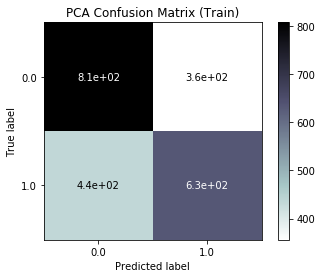

<Figure size 432x288 with 0 Axes>

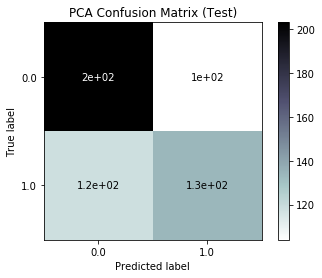

In [152]:
# plot confusion matrices

# train data
plt.figure()
plot_confusion_matrix(logreg_pca, X_train, y_train, cmap=plt.cm.bone_r)
plt.title('PCA Confusion Matrix (Train)')
plt.show()

# test data
plt.figure()
plot_confusion_matrix(logreg_pca, X_test, y_test, cmap=plt.cm.bone_r)
plt.title('PCA Confusion Matrix (Test)')
plt.show()

### Logistic Regression With 2-D LDA Model
Next, I built another logistic regression classifier using the original pixel data, now using LDA with 2 components (2-D).

In [147]:
# implement Pipeline to use LDA on a logreg classifier

# set up LDA
lda = LinearDiscriminantAnalysis(n_components=1)

# set up the pipeline steps
steps = [('lda', lda),
         ('logreg3', LogisticRegression(C=1, solver='saga', tol=1))]
        
# create the pipeline
pipeline = Pipeline(steps)

# fit a logreg classifier with LDA
logreg_lda = pipeline.fit(X_train, y_train)

# predict the labels of the test set
y_pred_lda = logreg_lda.predict(X_test)

In [148]:
# compute and print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred_lda))

# ccompute and print accuracy scores and error rates
score_train_lda = np.round(logreg_lda.score(X_train, y_train),3)
score_test_lda = np.round(logreg_lda.score(X_test, y_test),3)
print(f'Accuracy Score (Train): {score_train_lda}')
print(f'Accuracy Score (Test): {score_test_lda}')
print(f'Error Rate (Train): {1-score_train_lda}')
print(f'Error Rate (Test): {1-score_test_lda}')

Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.56      0.57       307
         1.0       0.49      0.50      0.50       252

    accuracy                           0.54       559
   macro avg       0.53      0.53      0.53       559
weighted avg       0.54      0.54      0.54       559

Accuracy Score (Train): 0.975
Accuracy Score (Test): 0.537
Error Rate (Train): 0.025000000000000022
Error Rate (Test): 0.46299999999999997


<Figure size 432x288 with 0 Axes>

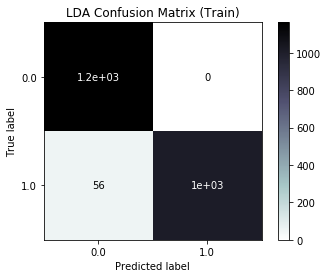

<Figure size 432x288 with 0 Axes>

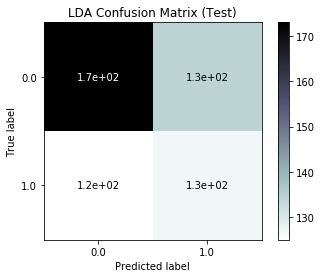

In [149]:
# plot confusion matrices

# train data
plt.figure()
plot_confusion_matrix(logreg_lda, X_train, y_train, cmap=plt.cm.bone_r)
plt.title('LDA Confusion Matrix (Train)')
plt.show()

# test data
plt.figure()
plot_confusion_matrix(logreg_lda, X_test, y_test, cmap=plt.cm.bone_r)
plt.title('LDA Confusion Matrix (Test)')
plt.show()

### Discussion

In [153]:
# print results from all 3 model variations
results = ({'Model': ['Logreg', 'Logreg PCA', 'Logreg LDA'],
           'Training Error': [1-score_train, 1-score_train_pca, 1-score_train_lda],
            'Testing Error': [1-score_test, 1-score_test_pca, 1-score_test_lda]
           })

results_df = pd.DataFrame(results)
results_df

,Model,Training Error,Testing Error
0,Logreg,0.384,0.385
1,Logreg PCA,0.355,0.397
2,Logreg LDA,0.025,0.463


Three models were used to classify whether an image contained a picture of a shirt (Type = 0) or a jersey (Type = 1):
- Model 1: A logistic regression model.
- Model 2: A logistic regression model using Principal Component Analysis (PCA) with 500 dimensions (95% variance explained).
- Model 3: A logistic regression model using Linear Discriminant Analysis (LDA) with one component. 

As seen in the results in the above table, the model with the lowest error rate was the logistic regression model without any PCA or LDA. This result makes sense because Model 1 uses all of the components. However, PCA and LDA reduce the number of components required to make predictions, making the calculations quicker, which is helpful for large datasets.

Between the two models that use dimension reduction, Model 3 had a lower (near-zero) error rate than Model 2 on the training dataset, but Model 2 had a lower error rate than Model 3 on the test dataset. Model 2 behaved similarly to Model 1 in terms of precision, recall, and accuracy. Model 3 had lower overall precision, recall, and accuracy because it is overfit during training. 

Based on this information, I would recommend using Model 1 because it had the lowest error rate the testing dataset. Model 1 performs better on unseen data and therefore makes more accurate predictions. However, I would recommend using Model 2 with PCA for large datasets because it performs almost as well as Model 1 while speeding up logistic regression calculations since the data is reduced to a smaller size.